l'objectif de ce TP est d'effectuer une étude comparative sur l'impact des différents optimiseurs de deep learning.

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

C:\Users\Afandi Soufiane\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.utils import to_categorical

In [64]:
import seaborn as sns
plt.style.use('seaborn-dark')

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train[0].shape

(28, 28)

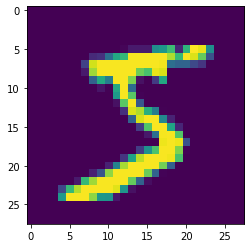

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [10]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [11]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test  = x_test.reshape(x_test.shape[0],28,28,1)
input_shape = (28,28,1)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [14]:
total_classes = len(np.unique(y_train))
print(total_classes)

10


In [15]:
y_train = to_categorical(y_train, total_classes)
y_test = to_categorical(y_test, total_classes)

In [16]:
x_train  = x_train.astype('float32')
x_test   = x_test.astype('float32')

x_train /= 255
x_test  /= 255

In [17]:
28*28

784

In [28]:
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(16, activation='relu'))          
model.add(Dropout(0.2))          
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))          
model.add(Dense(10, activation='softmax'))

# 1 - essayons l'optimiseur Stochastic Gradient Descent (SGD)

In [29]:
from tensorflow.keras.optimizers import SGD

In [30]:
def gradient_descent(gradient, start, learn_rate, n_iter=50, tolerance=1e-06):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

In [31]:
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

In [32]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

In [43]:
# model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])Adamax

In [44]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                25120     
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dropout_13 (Dropout)        (None, 16)                0         
                                                                 
 dense_18 (Dense)            (None, 10)                170       
                                                                 
Total params: 26,090
Trainable params: 26,090
Non-trai

In [45]:
x_train.shape

(60000, 28, 28, 1)

In [46]:
xx_train = x_train
xx_train = xx_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))

In [47]:
xx_train.shape

(60000, 784)

In [48]:
y_train.shape

(60000, 10)

In [52]:
history = model.fit(xx_train, y_train, epochs=7, batch_size=10)

Epoch 1/7
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3617 - accuracy: 0.8987
Epoch 2/7
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3556 - accuracy: 0.8991
Epoch 3/7
6000/6000 [==============================] - 13s 2ms/step - loss: 0.3492 - accuracy: 0.9025
Epoch 4/7
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3460 - accuracy: 0.9038
Epoch 5/7
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3368 - accuracy: 0.9065
Epoch 6/7
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3350 - accuracy: 0.9082
Epoch 7/7
6000/6000 [==============================] - 12s 2ms/step - loss: 0.3320 - accuracy: 0.9076


In [60]:
xx_test = x_test
xx_test = xx_test.reshape((xx_test.shape[0], xx_test.shape[1]*xx_test.shape[2]))

In [62]:
loss, accuracy = model.evaluate(xx_test, y_test)

print('Model Loss: %.2f, Accuracy: %.2f'% ((loss*100), (accuracy*100)))

313/313 [==============================] - 1s 2ms/step - loss: 0.2260 - accuracy: 0.9398
Model Loss: 22.60, Accuracy: 93.98


In [66]:
history.history.get('loss')

[0.3616519868373871,
 0.3555563688278198,
 0.34920114278793335,
 0.3459922969341278,
 0.33679988980293274,
 0.33497288823127747,
 0.33198457956314087]

In [69]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

<AxesSubplot:>

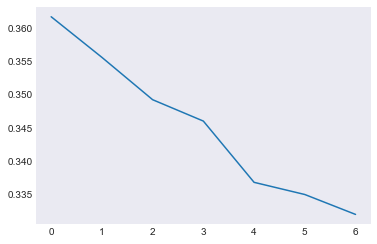

In [72]:
sns.lineplot(x=np.arange(7), y=history.history.get('loss'))

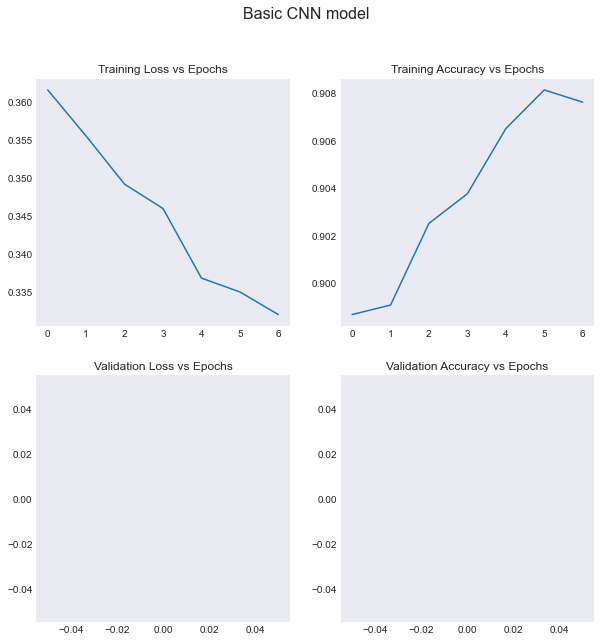

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.lineplot(x=np.arange(7), y=history.history.get('loss'), ax=ax[0, 0])
sns.lineplot(x=np.arange(7), y=history.history.get('accuracy'), ax=ax[0, 1])
sns.lineplot(x=np.arange(7), y=history.history.get('val_loss'), ax=ax[1, 0])
sns.lineplot(x=np.arange(7), y=history.history.get('val_accuracy'), ax=ax[1, 1])
ax[0, 0].set_title('Training Loss vs Epochs')
ax[0, 1].set_title('Training Accuracy vs Epochs')
ax[1, 0].set_title('Validation Loss vs Epochs')
ax[1, 1].set_title('Validation Accuracy vs Epochs')
fig.suptitle('Basic CNN model', size=16)
plt.show()

# 2 - essayons l'optimiseur SGDMomentum

In [78]:
def momentum(a, _, moms, __):
    previous_momentum = moms[-1]
    
    mom = a.grad * 0.1 + previous_momentum * 0.9
    moms.append(mom)
    a.data -= mom
    a.grad = None
# my_model.train(momentum)

# 3 - essayons l'optimiseur AdaGrad

In [83]:
from tensorflow.keras.optimizers import Adagrad
model.compile(loss="categorical_crossentropy", optimizer=Adagrad, metrics=["accuracy"])
history = model.fit(xx_train, y_train, epochs=7, batch_size=10)

ValueError: Could not interpret optimizer identifier: <class 'keras.optimizer_v2.adagrad.Adagrad'>

# 4 - essayons l'optimiseur RMSprop

In [53]:
def RMSprop(a, lr, _, RMSs):
    previous_RMS = RMSs[-1]
    
    RMS = (a.grad ** 2 * 0.1 + previous_RMS * 0.9)
    RMSs.append(RMS)
    # Gamma is added to make sure there is never divide with zero
    gamma = 1E-5
    a.data -= (a.grad * lr) / (torch.sqrt(RMS) + gamma)
    a.grad = None

# 5 - essayons l'optimiseur Adam

In [54]:
def Adam(a, lr, moms, RMSs):
    previous_momentum = moms[-1]
    mom = a.grad * 0.1 + previous_momentum * 0.9
    moms.append(mom)
    
    previous_RMS = RMSs[-1]
    RMS = a.grad ** 2 * 0.1 + previous_RMS * 0.9
    RMSs.append(RMS)
    
    gamma = 1E-5
    a.data -= (mom * lr) / (torch.sqrt(RMS) + gamma)
    a.grad = None

# Résumé :

In [23]:
batch_size  = 64
num_classes = 10
epochs      = 10

def build_model(optimizer):

    model=Sequential()
    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

    return model

In [24]:
y_test.shape

(10000, 10)

In [25]:
y_train.shape

(60000, 10)

In [26]:
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']

for i in optimizers:
    model = build_model(i)
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
938/938 [==============================] - 70s 72ms/step - loss: 2.2413 - accuracy: 0.1731 - val_loss: 2.1156 - val_accuracy: 0.5245
Epoch 2/10
938/938 [==============================] - 60s 64ms/step - loss: 2.0613 - accuracy: 0.3839 - val_loss: 1.9170 - val_accuracy: 0.6957
Epoch 3/10
938/938 [==============================] - 58s 62ms/step - loss: 1.8780 - accuracy: 0.5235 - val_loss: 1.7124 - val_accuracy: 0.7557
Epoch 4/10
938/938 [==============================] - 58s 62ms/step - loss: 1.6920 - accuracy: 0.6047 - val_loss: 1.5139 - val_accuracy: 0.7840
Epoch 5/10
938/938 [==============================] - 58s 61ms/step - loss: 1.5177 - accuracy: 0.6503 - val_loss: 1.3333 - val_accuracy: 0.8017
Epoch 6/10
938/938 [==============================] - 59s 63ms/step - loss: 1.3648 - accuracy: 0.6820 - val_loss: 1.1739 - val_accuracy: 0.8163
Epoch 7/10
938/938 [==============================] - 58s 62ms/step - loss: 1.2302 - accuracy: 0.7064 - val_loss: 1.0396 - val_accuracy: